<a href="https://colab.research.google.com/github/Maharshi-Project/InvestSmart/blob/main/Mandate_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **POS Tagging Using Spacy**

In [ ]:
!pip install spacy

In [ ]:
import spacy
from spacy import displacy # Serve a dependency parse tree or named entity visualization to view
import pandas as pd

In [ ]:
nlp = spacy.load('en_core_web_sm')

In [ ]:
spacy.info("en_core_web_sm")

In [ ]:
doc = nlp(u"It took me more than two hours to translate a few pages of English.")

In [ ]:
doc[1].pos_

'VERB'

In [ ]:
doc[1].tag_

'VBD'

In [ ]:
spacy.explain('VBD')

'verb, past tense'

In [ ]:
words = []
POS = []
Tag = []
Tag_Meaning = []
for word in doc:
  words.append(word)
  POS.append(word.pos_)
  Tag.append(word.tag_)
  Tag_Meaning.append(spacy.explain(word.tag_))

Data = {
    "Words":words,
    "POS":POS,
    "Tag":Tag,
    "Tag_Meaning":Tag_Meaning
}

In [ ]:
df = pd.DataFrame(Data)
df

,Words,POS,Tag,Tag_Meaning
0,It,PRON,PRP,"pronoun, personal"
1,took,VERB,VBD,"verb, past tense"
2,me,PRON,PRP,"pronoun, personal"
3,more,ADJ,JJR,"adjective, comparative"
4,than,ADP,IN,"conjunction, subordinating or preposition"
5,two,NUM,CD,cardinal number
6,hours,NOUN,NNS,"noun, plural"
7,to,PART,TO,"infinitival ""to"""
8,translate,VERB,VB,"verb, base form"
9,a,DET,DT,determiner


**Named Entity Recognition (NER) using Spacy**

In [ ]:
for ent in doc.ents:
  print(f"Text: {ent.text}, Label: {ent.label_}")

Text: more than two hours, Label: TIME
Text: English, Label: LANGUAGE


In [ ]:
displacy.render(doc,style='ent')

**POS Tagging with Bi-LSTM Model(With Data Pre-Processing)**

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional, Embedding
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import nltk

# Download the Penn Treebank corpus if you haven't already
nltk.download('treebank')

nltk.download('universal_tagset')

# Load the tagged sentences from the Penn Treebank corpus
ptb_tagged_sentences = nltk.corpus.treebank.tagged_sents(tagset='universal')

# Preprocess the tagged sentences
processed_sentences = []
for sentence in ptb_tagged_sentences:
    processed_sentence = [(word.lower(), tag) for word, tag in sentence if word.isalnum()]
    processed_sentences.append(processed_sentence)

# Prepare data
word_to_index = {}
tag_to_index = {}
X = []
y = []
for sentence in processed_sentences:
    X_sentence = []
    y_sentence = []
    for word, tag in sentence:
        if word not in word_to_index:
            word_to_index[word] = len(word_to_index) + 1
        if tag not in tag_to_index:
            tag_to_index[tag] = len(tag_to_index) + 1
        X_sentence.append(word_to_index[word])
        y_sentence.append(tag_to_index[tag])
    X.append(X_sentence)
    y.append(y_sentence)

# Convert to numpy arrays
X = pad_sequences(X)
y = pad_sequences(y)

# One-hot encode the POS tags
y = to_categorical(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define model architecture
vocab_size = len(word_to_index) + 1
embedding_dim = 100
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim))
model.add(Bidirectional(LSTM(units=100, return_sequences=True)))
model.add(Dense(len(tag_to_index) + 1, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=128, epochs=5, validation_split=0.1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


Epoch 1/5
23/23 [==============================] - 36s 1s/step - loss: 1.2456 - accuracy: 0.8008 - val_loss: 0.4511 - val_accuracy: 0.8339
Epoch 2/5
23/23 [==============================] - 26s 1s/step - loss: 0.4157 - accuracy: 0.8808 - val_loss: 0.3922 - val_accuracy: 0.8849
Epoch 3/5
23/23 [==============================] - 15s 653ms/step - loss: 0.3695 - accuracy: 0.8904 - val_loss: 0.3658 - val_accuracy: 0.8891
Epoch 4/5
23/23 [==============================] - 15s 650ms/step - loss: 0.3496 - accuracy: 0.8917 - val_loss: 0.3511 - val_accuracy: 0.8885
Epoch 5/5
25/25 [==============================] - 2s 80ms/step - loss: 0.3422 - accuracy: 0.8889
Test Accuracy: 0.88894122838974


**POS Tagging with Bi-LSTM model (Without Data Pre-Processing)**

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional, Embedding
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import nltk

# Download the Penn Treebank corpus if you haven't already
nltk.download('treebank')

# Load the tagged sentences from the Penn Treebank corpus
ptb_tagged_sentences = nltk.corpus.treebank.tagged_sents(tagset='universal')

# Prepare data
word_to_index = {}
tag_to_index = {}
X = []
y = []
for sentence in ptb_tagged_sentences:
    X_sentence = []
    y_sentence = []
    for word, tag in sentence:
        if word not in word_to_index:
            word_to_index[word] = len(word_to_index) + 1
        if tag not in tag_to_index:
            tag_to_index[tag] = len(tag_to_index) + 1
        X_sentence.append(word_to_index[word])
        y_sentence.append(tag_to_index[tag])
    X.append(X_sentence)
    y.append(y_sentence)

# Convert to numpy arrays
X = pad_sequences(X)
y = pad_sequences(y)

# One-hot encode the POS tags
y = to_categorical(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define model architecture
vocab_size = len(word_to_index) + 1
embedding_dim = 100
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim))
model.add(Bidirectional(LSTM(units=100, return_sequences=True)))
model.add(Dense(len(tag_to_index) + 1, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=128, epochs=5, validation_split=0.1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)


[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!


Epoch 1/5
23/23 [==============================] - 65s 3s/step - loss: 0.9333 - accuracy: 0.9061 - val_loss: 0.2881 - val_accuracy: 0.9038
Epoch 2/5
23/23 [==============================] - 38s 2s/step - loss: 0.2647 - accuracy: 0.9151 - val_loss: 0.2497 - val_accuracy: 0.9227
Epoch 3/5
23/23 [==============================] - 34s 1s/step - loss: 0.2364 - accuracy: 0.9291 - val_loss: 0.2338 - val_accuracy: 0.9304
Epoch 4/5
23/23 [==============================] - 37s 2s/step - loss: 0.2248 - accuracy: 0.9320 - val_loss: 0.2250 - val_accuracy: 0.9304
Epoch 5/5
25/25 [==============================] - 3s 135ms/step - loss: 0.2205 - accuracy: 0.9306
Test Accuracy: 0.9306433200836182


**HMM Model Without Data Pre-Processing**

In [ ]:
import nltk
from nltk.corpus import treebank
from nltk.tag import hmm

# Download the Penn Treebank corpus if you haven't already
nltk.download('treebank')

# Load the tagged sentences from the Penn Treebank corpus
tagged_sentences = treebank.tagged_sents(tagset='universal')

# Train-test split
train_size = int(0.8 * len(tagged_sentences))
train_sents = tagged_sentences[:train_size]
test_sents = tagged_sentences[train_size:]

# Train the HMM model
trainer = hmm.HiddenMarkovModelTrainer()
hmm_model = trainer.train(train_sents)

# Evaluate the model
accuracy = hmm_model.evaluate(test_sents)
print("Test Accuracy:", accuracy)


[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!
<ipython-input-119-cc5bcfec3cbe>:21: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  accuracy = hmm_model.evaluate(test_sents)
/usr/local/lib/python3.10/dist-packages/nltk/tag/hmm.py:336: RuntimeWarning: overflow encountered in cast
  O[i, k] = self._output_logprob(si, self._symbols[k])
/usr/local/lib/python3.10/dist-packages/nltk/tag/hmm.py:364: RuntimeWarning: overflow encountered in cast
  O[i, k] = self._output_logprob(si, self._symbols[k])


Test Accuracy: 0.5137481910274964


**HMM Model Accuracy Test With Data Pre-Processing**

In [ ]:
import nltk
import string
from nltk.corpus import treebank
from nltk.tag import hmm

# Download the Penn Treebank corpus if you haven't already
nltk.download('treebank')

# Load the tagged sentences from the Penn Treebank corpus
tagged_sentences = treebank.tagged_sents(tagset='universal')

# Preprocess the tagged sentences
def preprocess_tagged_sentences(tagged_sentences):
    preprocessed_sentences = []
    for sentence in tagged_sentences:
        preprocessed_sentence = [(word.lower(), tag) for word, tag in sentence if word.isalnum()]
        preprocessed_sentences.append(preprocessed_sentence)
    return preprocessed_sentences

# Apply preprocessing
preprocessed_train_sents = preprocess_tagged_sentences(tagged_sentences)

# Train-test split
train_size = int(0.8 * len(preprocessed_train_sents))
train_sents = preprocessed_train_sents[:train_size]
test_sents = preprocessed_train_sents[train_size:]

# Train the HMM model
trainer = hmm.HiddenMarkovModelTrainer()
hmm_model = trainer.train(train_sents)

# Evaluate the model
accuracy = hmm_model.evaluate(test_sents)
print("Test Accuracy:", accuracy)

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!
<ipython-input-120-e82d419ea9e0>:33: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  accuracy = hmm_model.evaluate(test_sents)
/usr/local/lib/python3.10/dist-packages/nltk/tag/hmm.py:334: RuntimeWarning: overflow encountered in cast
  X[i, j] = self._transitions[si].logprob(self._states[j])
/usr/local/lib/python3.10/dist-packages/nltk/tag/hmm.py:332: RuntimeWarning: overflow encountered in cast
  P[i] = self._priors.logprob(si)


Test Accuracy: 0.626985670751475


**HMM Model With Viteribi Algorithm**

In [ ]:
!pip install nltk
import nltk
nltk.download('universal_tagset')
nltk.download('punkt')

[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk
from nltk.tag import hmm

nltk.download('treebank')
tagged_sentences = nltk.corpus.treebank.tagged_sents(tagset='universal')

# Preprocess the tagged sentences
def preprocess_tagged_sentences(tagged_sentences):
    preprocessed_sentences = []
    for sentence in tagged_sentences:
        preprocessed_sentence = [(word.lower(), tag) for word, tag in sentence if word.isalnum()]
        preprocessed_sentences.append(preprocessed_sentence)
    return preprocessed_sentences

# Apply preprocessing
preprocessed_train_sents = preprocess_tagged_sentences(tagged_sentences)

# Train the HMM model
trainer = hmm.HiddenMarkovModelTrainer()
hmm_model = trainer.train_supervised(preprocessed_train_sents)

# Example sentence for decoding
sentence = "The quick brown fox jumps over the lazy dog."

# Tokenize and preprocess the sentence
tokenized_sentence = nltk.word_tokenize(sentence.lower())
preprocessed_sentence = [word for word in tokenized_sentence if word.isalnum()]

# Decode the most likely sequence of POS tags using the Viterbi algorithm
tagged_sentence = hmm_model.tag(preprocessed_sentence)

# Print the tagged sentence
print("Tagged Sentence:", tagged_sentence)

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!


Tagged Sentence: [('the', 'DET'), ('quick', 'ADJ'), ('brown', 'NOUN'), ('fox', 'NOUN'), ('jumps', 'NOUN'), ('over', 'NOUN'), ('the', 'NOUN'), ('lazy', 'NOUN'), ('dog', 'NOUN')]


**POS Tagging implementation with Random Forest Classifier**

In [ ]:
import nltk
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import Pipeline

# Download the Penn Treebank corpus if you haven't already
nltk.download('treebank')

# Load the tagged sentences from the Penn Treebank corpus
tagged_sentences = nltk.corpus.treebank.tagged_sents(tagset='universal')

# Preprocess the tagged sentences and extract features
def extract_features(sentence, index):
    word = sentence[index][0]
    features = {
        'word': word,
        'word_lower': word.lower(),
        'is_first': index == 0,
        'is_last': index == len(sentence) - 1,
        'prefix_2': word[:2],
        'prefix_3': word[:3],
        'suffix_2': word[-2:],
        'suffix_3': word[-3:],
        'prev_word': '' if index == 0 else sentence[index - 1][0],
        'next_word': '' if index == len(sentence) - 1 else sentence[index + 1][0]
    }
    return features

def preprocess_tagged_sentences(tagged_sentences):
    preprocessed_sentences = []
    for sentence in tagged_sentences:
        preprocessed_sentence = [(word.lower(), tag) for word, tag in sentence if word.isalnum()]
        preprocessed_sentences.append(preprocessed_sentence)
    return preprocessed_sentences

def features_labels(tagged_sentences):
    data = []
    for sentence in tagged_sentences:
        for i, (word, tag) in enumerate(sentence):
            features = extract_features(sentence, i)
            data.append((features, tag))
    return data

# Apply preprocessing
preprocessed_train_sents = preprocess_tagged_sentences(tagged_sentences)
train_data = features_labels(preprocessed_train_sents)

# Train-test split
train_size = int(0.8 * len(train_data))
train_set = train_data[:train_size]
test_set = train_data[train_size:]

# Define a pipeline for feature extraction and classification
pipeline = Pipeline([
    ('vectorizer', DictVectorizer()),
    ('classifier', RandomForestClassifier(n_estimators=100))
])

# Train the Random Forest classifier
pipeline.fit([x[0] for x in train_set], [x[1] for x in train_set])

# Evaluate the model
accuracy = pipeline.score([x[0] for x in test_set], [x[1] for x in test_set])
print("Test Accuracy:", accuracy)

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!


Test Accuracy: 0.956518946692357


**Dependency Parsing usign Spacy**

In [ ]:
displacy.render(doc,style='dep')

In [ ]:
options = {
    'distance':100,
    'compact':True
}

In [ ]:
displacy.render(doc,style="dep",options=options)

In [ ]:
!pip install stanza graphviz

In [ ]:
import stanza
import graphviz
from IPython.display import display, SVG

In [ ]:
nlp = stanza.Pipeline('en', processors='tokenize,pos,lemma,depparse')

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |
| depparse  | combined_charlm   |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Done loading processors!


In [ ]:
doc = nlp("Deemed universities charge huge fees")

**Dependency parsing using Stanza**

Word: Deemed, Dependency Relation: amod, Head Index: 2
Word: universities, Dependency Relation: nsubj, Head Index: 3
Word: charge, Dependency Relation: root, Head Index: 0
Word: huge, Dependency Relation: amod, Head Index: 5
Word: fees, Dependency Relation: obj, Head Index: 3


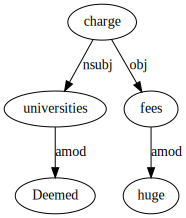

In [ ]:
# Create a directed graph using graphviz
dependency_graph = graphviz.Digraph()

sentence = doc.sentences[0]

for word in sentence.words:
    dependency_graph.node(str(word.id), word.text)
    if(word.head > 0):
      dependency_graph.edge(str(word.head), str(word.id), label=word.deprel)
    print(f"Word: {word.text}, Dependency Relation: {word.deprel}, Head Index: {word.head}")
display(SVG(dependency_graph.pipe(format='svg')))

**Constituency parsing using Stanza**

In [ ]:
nlp = stanza.Pipeline('en', processors='tokenize,pos,constituency')

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor    | Package             |
--------------------------------------
| tokenize     | combined            |
| mwt          | combined            |
| pos          | combined_charlm     |
| constituency | ptb3-revised_charlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: constituency
INFO:stanza:Done loading processors!


In [ ]:
doc = nlp("Deemed universities charge huge fees")

In [ ]:
def add_constituency_nodes_edges(node, graph, parent_id=None):
    # Create a unique ID for the node
    node_id = str(id(node))
    # Add the node to the graph
    graph.node(node_id, label=node.label)
    # If there is a parent, add an edge from the parent to the node
    if parent_id:
        graph.edge(parent_id, node_id)
    # Recursively add child nodes and edges
    for child in node.children:
        add_constituency_nodes_edges(child, graph, node_id)

(ROOT (S (NP (VBN Deemed) (NNS universities)) (VP (VBP charge) (NP (JJ huge) (NNS fees)))))


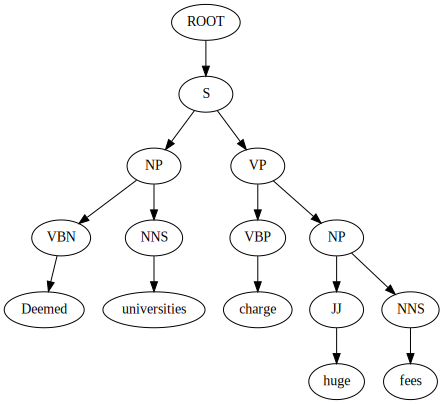

In [ ]:
sentence = doc.sentences[0]

# Create a directed graph using graphviz
constituency_graph = graphviz.Digraph()

add_constituency_nodes_edges(sentence.constituency, constituency_graph)

for sentence in doc.sentences:
    print(sentence.constituency)

display(SVG(constituency_graph.pipe(format='svg')))

**Dependency Parsing With Stanza and Visualize with NetworkX**


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |
| depparse  | combined_charlm   |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Done loading processors!


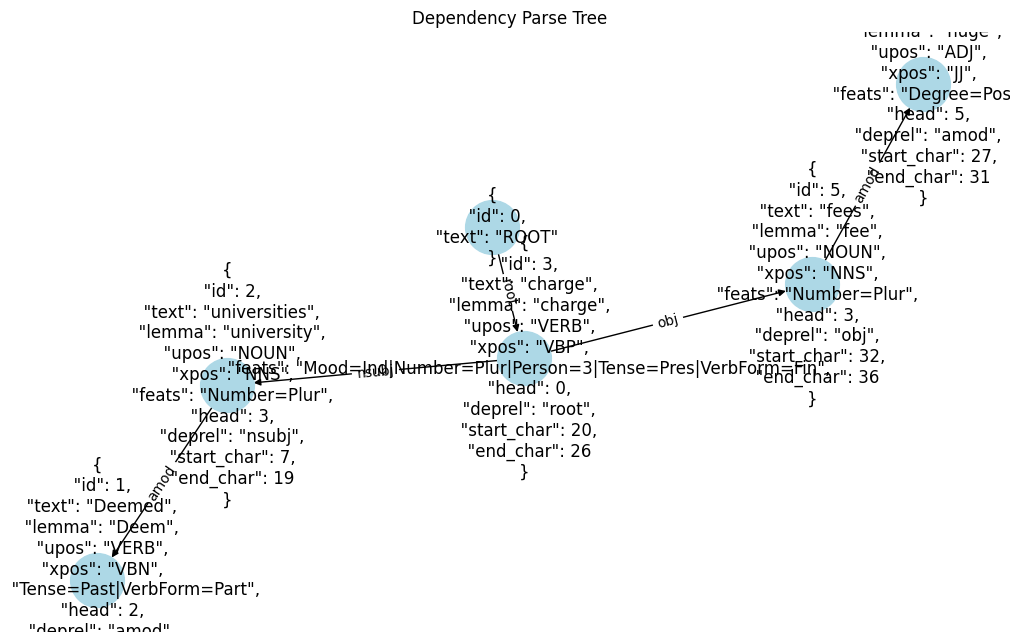

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the sentence
sentence = 'Deemed universities charge huge fees'

# Build a Neural Pipeline
nlp = stanza.Pipeline('en', processors="tokenize,mwt,pos,lemma,depparse")

# Pass the sentence through the pipeline
doc = nlp(sentence)

# Extract the dependency relations
deps = doc.sentences[0].dependencies

# Initialize a directed graph
G = nx.DiGraph()

# Add nodes and edges to the graph based on dependency relations
for dep in deps:
    governor, relation, dependent = dep
    G.add_node(governor)
    G.add_node(dependent)
    G.add_edge(governor, dependent, label=relation)

# Draw the graph
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1500, font_size=12, arrows=True)
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title('Dependency Parse Tree')
plt.show()

**Dependency Parsing With Stanza and Visualize with DOT Defination**

---



Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.9/104.9 kB 1.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for pygraphviz (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pygraphviz
Failed to build pygraphviz
ERROR: Could not build wheels for pygraphviz, which is required to install pyproject.toml-based projects


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |
| depparse  | combined_charlm   |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Done loading processors!


digraph G {
"universities" -> "Deemed" [label="amod"];
"charge" -> "universities" [label="nsubj"];
"ROOT" -> "charge" [label="root"];
"fees" -> "huge" [label="amod"];
"charge" -> "fees" [label="obj"];
}


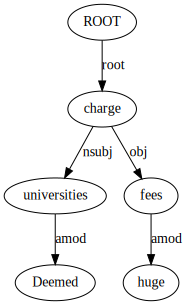

In [ ]:
import stanza
from graphviz import Source

# Install stanza and graphviz
!pip install stanza
!pip install graphviz

# Set up Graphviz in Colab
!apt-get install graphviz
!pip install pygraphviz

# Define the sentence
sentence = 'Deemed universities charge huge fees'

# Build a Neural Pipeline
nlp = stanza.Pipeline('en', processors="tokenize,mwt,pos,lemma,depparse")

# Pass the sentence through the pipeline
doc = nlp(sentence)

# Extract the dependency relations
deps = doc.sentences[0].dependencies

# Initialize a string to store the DOT definition
dot_definition = 'digraph G {\n'

# Add nodes and edges to the DOT definition
for dep in deps:
    governor, relation, dependent = dep
    governor_text = governor.text
    dependent_text = dependent.text
    dot_definition += f'"{governor_text}" -> "{dependent_text}" [label="{relation}"];\n'

# Close the DOT definition
dot_definition += '}'

# Print the DOT definition
print(dot_definition)

# Render the graph using Graphviz
Source(dot_definition)